In [2]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

/var/folders/8w/r2ql930j0q54r_6xjp8xdvfw0000gn/T/ipykernel_1459/854452510.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


<br><hr><h1><b>PRINCIPAL DIMENSIONALITY REDUCTION

<a href = https://colab.research.google.com/drive/1kWZ07AKE41LYmeYQflVpzgNWE8lcaF2m>Link To Colab Notebook Full Explanation</a>

In [3]:
data = pd.read_csv('BankChurners.csv')
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


<br><hr><h1><b>processing data

In [4]:
x = data.drop(['CLIENTNUM', 'Attrition_Flag'], axis = 1)

from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

for i in x:
    if x[i].dtypes == 'O':
        x[i] = lb.fit_transform(x[i])
x.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,45,1,3,3,1,2,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,49,0,5,2,2,4,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,51,1,3,2,1,3,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,40,0,4,3,3,4,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,40,1,3,5,1,2,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


<br><hr><h1><b>Instantiate the Algorithim

In [5]:
data = pd.read_csv('train.csv')
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [6]:
from sklearn.decomposition import PCA # ............................. Import the PCA Algorithm

pca = PCA(n_components = 3) # ........................... Instantiate PCA, and amount of
pca.fit(data) # .................................................... Fit the PCA Algorithm on the se
data_pca = pca.transform(data) # ...................................... Transform the data
frame_data_pca = pd.DataFrame(data_pca)
frame_data_pca

,0,1,2
0,430.596294,-795.788745,-390.070293
1,504.985048,696.622162,-235.629510
2,473.330120,763.941758,-680.059866
3,639.822549,779.690737,-630.784157
4,-718.985233,382.304896,591.040207
...,...,...,...
1995,-1461.096869,843.813017,-456.014820
1996,-94.445099,693.938289,708.385004
1997,930.670385,436.671822,664.296087
1998,-1252.738525,-629.883917,285.786696


In [7]:
# Find out how much information in the original dataset this
cumulative_variance = pca.explained_variance_ratio_
print(f"Cumulative Variance is :\n {cumulative_variance}")

Cumulative Variance is :
 [0.67043953 0.16517904 0.11006154]


In [8]:
# Show the total variance explained by the newly created features
print(f"\nTotal information captured: \n{sum([i for i in cumulative_variance])}")


Total information captured: 
0.945680114977916


Text(0.5, 1.0, 'Histogram scree plot')

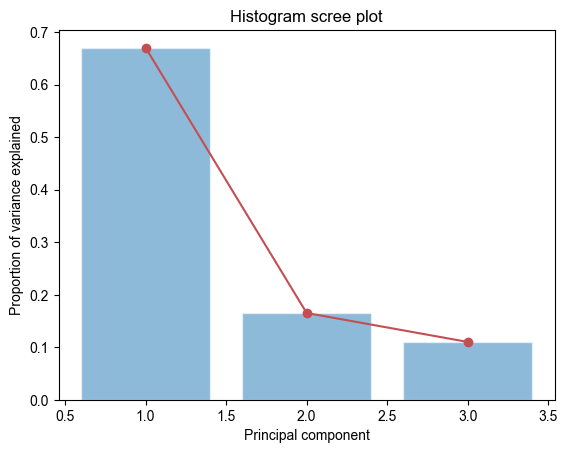

In [9]:
fig, ax = plt.subplots()
sns.set(style = 'darkgrid')
ax.bar(range(1,4 ), pca.explained_variance_ratio_, alpha=0.5, align='center')
ax.plot(range(1,4 ), cumulative_variance, 'o-', color='r')

plt.xlabel('Principal component')
plt.ylabel('Proportion of variance explained')
plt.title('Histogram scree plot')

In [10]:
import pandas as pd
import numpy as np
data = pd.read_csv('train.csv')
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [11]:
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [12]:
data.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df = data.copy()
for i in df.columns:
    df[i] = scaler.fit_transform(df[[i]])

df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,-0.902597,-0.990050,0.830779,-1.019184,-0.762495,-1.043966,-1.380644,0.340740,1.349249,-1.101971,...,-1.408949,-1.146784,0.391703,-0.784983,0.283103,1.462493,-1.786861,-1.006018,0.986097,-0.447214
1,-0.495139,1.010051,-1.253064,0.981177,-0.992890,0.957886,1.155024,0.687548,-0.120059,-0.664768,...,0.585778,1.704465,0.467317,1.114266,-0.635317,-0.734267,0.559641,0.994018,-1.014099,0.447214
2,-1.537686,1.010051,-1.253064,0.981177,-0.532099,0.957886,0.493546,1.381165,0.134244,0.209639,...,1.392684,1.074968,0.441498,-0.310171,-0.864922,-0.368140,0.559641,0.994018,-1.014099,0.447214
3,-1.419319,1.010051,1.198517,-1.019184,-0.992890,-1.043966,-1.215274,1.034357,-0.261339,0.646842,...,1.286750,1.236971,0.594569,0.876859,0.512708,-0.002014,0.559641,-1.006018,-1.014099,0.447214
4,1.325906,1.010051,-0.395011,-1.019184,2.002254,0.957886,0.658915,0.340740,0.021220,-1.101971,...,1.268718,-0.091452,-0.657666,-1.022389,-0.864922,0.730240,0.559641,0.994018,-1.014099,-0.447214


In [14]:
from sklearn.decomposition import PCA # ............................. Import the PCA Algorithm

pca = PCA(n_components = 6) # ........................... Instantiate PCA, and amount of
pca.fit(df) # .................................................... Fit the PCA Algorithm on the se
df_pca = pca.transform(df) # ...................................... Transform the df
frame_df_pca = pd.DataFrame(df_pca)
frame_df_pca

,0,1,2,3,4,5
0,-1.136070,0.200436,2.073192,-1.219589,-1.323426,0.208716
1,1.047064,-1.918083,-0.315341,0.205236,1.090433,-0.328641
2,0.755417,-1.248375,-0.074868,-0.159903,1.950815,-0.578550
3,0.976852,-1.091197,0.980418,1.177590,0.251358,0.606782
4,-0.252761,1.657807,-1.283814,0.161558,1.886454,1.923442
...,...,...,...,...,...,...
1995,-1.288930,-0.884659,-0.495036,1.343644,2.128458,0.349036
1996,0.887936,-1.396706,1.307130,0.441824,0.706825,0.267711
1997,1.619590,-1.213845,0.065413,-1.442353,1.843001,0.189628
1998,-1.698056,-1.255356,-1.475166,0.467463,-1.405413,1.045696


In [15]:
# Find out how much information in each columns
cumulative_variance = pca.explained_variance_ratio_
print(f"Cumulative Variance is :\n {cumulative_variance}")

Cumulative Variance is :
 [0.09597083 0.07982131 0.0767419  0.07355802 0.06793526 0.05315853]


In [16]:
# Show the total variance explained by the newly created columns
print(f"\nTotal information captured: \n{sum([i for i in cumulative_variance])}")


Total information captured: 
0.44718584734398015


Text(0.5, 1.0, 'Histogram scree plot')

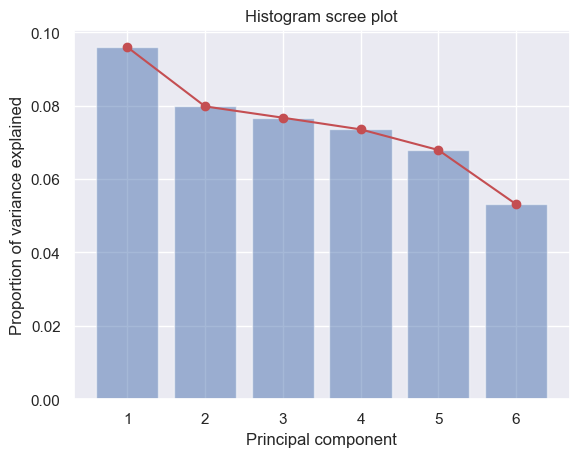

In [17]:
fig, ax = plt.subplots()
import seaborn as sns
sns.set(style = 'darkgrid')
ax.bar(range(1,7), pca.explained_variance_ratio_, alpha=0.5, align='center')
ax.plot(range(1,7 ), cumulative_variance, 'o-', color='r')

plt.xlabel('Principal component')
plt.ylabel('Proportion of variance explained')
plt.title('Histogram scree plot')

In [18]:
frame_df_pca

,0,1,2,3,4,5
0,-1.136070,0.200436,2.073192,-1.219589,-1.323426,0.208716
1,1.047064,-1.918083,-0.315341,0.205236,1.090433,-0.328641
2,0.755417,-1.248375,-0.074868,-0.159903,1.950815,-0.578550
3,0.976852,-1.091197,0.980418,1.177590,0.251358,0.606782
4,-0.252761,1.657807,-1.283814,0.161558,1.886454,1.923442
...,...,...,...,...,...,...
1995,-1.288930,-0.884659,-0.495036,1.343644,2.128458,0.349036
1996,0.887936,-1.396706,1.307130,0.441824,0.706825,0.267711
1997,1.619590,-1.213845,0.065413,-1.442353,1.843001,0.189628
1998,-1.698056,-1.255356,-1.475166,0.467463,-1.405413,1.045696


In [19]:
df = pd.read_csv('microsofts_malware_data.csv')
df.head()

,Unnamed: 0,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,...,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,0,0000028988387b115f69f31a3bf04f09,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1735.0,0,7.0,0,NaN,...,36144.0,0,NaN,0.0,0,0,0.0,0.0,10.0,0
1,1,000007535c3f730efa9ea0b7ef1bd645,win8defender,1.1.14600.4,4.13.17134.1,1.263.48.0,0,7.0,0,NaN,...,57858.0,0,NaN,0.0,0,0,0.0,0.0,8.0,0
2,2,000007905a28d863f6d0d597892cd692,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1341.0,0,7.0,0,NaN,...,52682.0,0,NaN,0.0,0,0,0.0,0.0,3.0,0
3,3,00000b11598a75ea8ba1beea8459149f,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1527.0,0,7.0,0,NaN,...,20050.0,0,NaN,0.0,0,0,0.0,0.0,3.0,1
4,4,000014a5f00daa18e76b81417eeb99fc,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1379.0,0,7.0,0,NaN,...,19844.0,0,0.0,0.0,0,0,0.0,0.0,1.0,1


In [20]:
df.isnull().sum().sort_values(ascending = False)

PuaMode                       9997
Census_ProcessorClass         9958
DefaultBrowsersIdentifier     9528
Census_IsFlightingInternal    8309
Census_InternalBatteryType    7120
                              ... 
Census_DeviceFamily              0
MachineIdentifier                0
Census_HasOpticalDiskDrive       0
Census_ChassisTypeName           0
HasDetections                    0
Length: 84, dtype: int64

In [21]:
pd.set_option('display.max_columns', None)
df.select_dtypes(exclude = 'number')

,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,Platform,Processor,OsVer,OsPlatformSubRelease,OsBuildLab,SkuEdition,PuaMode,SmartScreen,Census_MDC2FormFactor,Census_DeviceFamily,Census_ProcessorClass,Census_PrimaryDiskTypeName,Census_ChassisTypeName,Census_PowerPlatformRoleName,Census_InternalBatteryType,Census_OSVersion,Census_OSArchitecture,Census_OSBranch,Census_OSEdition,Census_OSSkuName,Census_OSInstallTypeName,Census_OSWUAutoUpdateOptionsName,Census_GenuineStateName,Census_ActivationChannel,Census_FlightRing
0,0000028988387b115f69f31a3bf04f09,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1735.0,windows10,x64,10.0.0.0,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,NaN,NaN,Desktop,Windows.Desktop,NaN,HDD,Desktop,Desktop,NaN,10.0.17134.165,amd64,rs4_release,Professional,PROFESSIONAL,UUPUpgrade,UNKNOWN,IS_GENUINE,Retail,Retail
1,000007535c3f730efa9ea0b7ef1bd645,win8defender,1.1.14600.4,4.13.17134.1,1.263.48.0,windows10,x64,10.0.0.0,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,NaN,NaN,Notebook,Windows.Desktop,NaN,HDD,Notebook,Mobile,NaN,10.0.17134.1,amd64,rs4_release,Professional,PROFESSIONAL,IBSClean,UNKNOWN,OFFLINE,Retail,NOT_SET
2,000007905a28d863f6d0d597892cd692,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1341.0,windows10,x64,10.0.0.0,rs4,17134.1.amd64fre.rs4_release.180410-1804,Home,NaN,RequireAdmin,Desktop,Windows.Desktop,NaN,SSD,Desktop,Desktop,NaN,10.0.17134.165,amd64,rs4_release,Core,CORE,UUPUpgrade,FullAuto,IS_GENUINE,OEM:NONSLP,Retail
3,00000b11598a75ea8ba1beea8459149f,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1527.0,windows10,x64,10.0.0.0,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,NaN,ExistsNotSet,Desktop,Windows.Desktop,NaN,UNKNOWN,MiniTower,Desktop,NaN,10.0.17134.228,amd64,rs4_release,Professional,PROFESSIONAL,UUPUpgrade,FullAuto,IS_GENUINE,OEM:NONSLP,Retail
4,000014a5f00daa18e76b81417eeb99fc,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1379.0,windows10,x64,10.0.0.0,rs4,17134.1.amd64fre.rs4_release.180410-1804,Home,NaN,RequireAdmin,Notebook,Windows.Desktop,NaN,HDD,Portable,Mobile,lion,10.0.17134.191,amd64,rs4_release,Core,CORE,Update,FullAuto,IS_GENUINE,Retail,Retail
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,004aad9e0c5fae58a1cd8a077e53af09,win8defender,1.1.15100.1,4.18.1806.18062,1.273.499.0,windows10,x64,10.0.0.0,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,NaN,RequireAdmin,Notebook,Windows.Desktop,NaN,SSD,Notebook,Mobile,NaN,10.0.17134.165,amd64,rs4_release,Professional,PROFESSIONAL,UUPUpgrade,FullAuto,IS_GENUINE,Retail,Retail
9996,004aadc1779b06368e94b3572f62da6e,win8defender,1.1.15100.1,4.14.17613.18039,1.273.1311.0,windows10,x64,10.0.0.0,rs1,14393.1198.amd64fre.rs1_release_sec.170427-1353,Home,NaN,ExistsNotSet,Notebook,Windows.Desktop,NaN,HDD,Notebook,Mobile,lion,10.0.14393.1198,amd64,rs1_release,CoreSingleLanguage,CORE_SINGLELANGUAGE,Update,FullAuto,IS_GENUINE,Retail,Retail
9997,004aade4fdb90b1d764b466829b170aa,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1198.0,windows10,x64,10.0.0.0,rs2,15063.0.amd64fre.rs2_release.170317-1834,Pro,NaN,RequireAdmin,Notebook,Windows.Desktop,NaN,HDD,Notebook,Mobile,NaN,10.0.15063.1266,amd64,rs2_release,Professional,PROFESSIONAL,Upgrade,FullAuto,IS_GENUINE,Retail,Retail
9998,004ab08c3c3e660f85e06fac08c5a0f8,win8defender,1.1.15200.1,4.18.1807.18075,1.275.995.0,windows10,x64,10.0.0.0,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,NaN,ExistsNotSet,Desktop,Windows.Desktop,NaN,SSD,Desktop,Desktop,NaN,10.0.17134.228,amd64,rs4_release,Professional,PROFESSIONAL,UUPUpgrade,FullAuto,IS_GENUINE,Volume:GVLK,Retail


In [22]:
num = df.select_dtypes(include = 'number')
cat = df.select_dtypes(exclude = 'number')

display(num.head())
display(cat.head())

,Unnamed: 0,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,OsBuild,OsSuite,IsProtected,AutoSampleOptIn,SMode,IeVerIdentifier,Firewall,UacLuaenable,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,Census_ProcessorModelIdentifier,Census_PrimaryDiskTotalCapacity,Census_SystemVolumeTotalCapacity,Census_HasOpticalDiskDrive,Census_TotalPhysicalRAM,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_InternalBatteryNumberOfCharges,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_IsPortableOperatingSystem,Census_IsFlightingInternal,Census_IsFlightsDisabled,Census_ThresholdOptIn,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,0,0,7.0,0,NaN,53447.0,1.0,1.0,1,29,128035.0,18.0,35.0,171,17134,256,1.0,0,0.0,137.0,1.0,1.0,2668.0,9124.0,4.0,5.0,2341.0,476940.0,299451.0,0,4096.0,18.9,1440.0,900.0,4.294967e+09,17134,165,26.0,119,0,NaN,0.0,NaN,628.0,36144.0,0,NaN,0.0,0,0,0.0,0.0,10.0,0
1,1,0,7.0,0,NaN,53447.0,1.0,1.0,1,93,1482.0,18.0,119.0,64,17134,256,1.0,0,0.0,137.0,1.0,1.0,2668.0,91656.0,4.0,5.0,2405.0,476940.0,102385.0,0,4096.0,13.9,1366.0,768.0,1.000000e+00,17134,1,8.0,31,0,NaN,0.0,NaN,628.0,57858.0,0,NaN,0.0,0,0,0.0,0.0,8.0,0
2,2,0,7.0,0,NaN,53447.0,1.0,1.0,1,86,153579.0,18.0,64.0,49,17134,768,1.0,0,0.0,137.0,1.0,1.0,4909.0,317701.0,4.0,5.0,1972.0,114473.0,113907.0,0,4096.0,21.5,1920.0,1080.0,4.294967e+09,17134,165,7.0,30,0,NaN,0.0,NaN,142.0,52682.0,0,NaN,0.0,0,0,0.0,0.0,3.0,0
3,3,0,7.0,0,NaN,53447.0,1.0,1.0,1,88,20710.0,NaN,117.0,115,17134,256,1.0,0,0.0,137.0,1.0,1.0,1443.0,275890.0,4.0,5.0,2273.0,238475.0,227116.0,0,4096.0,18.5,1366.0,768.0,4.294967e+09,17134,228,17.0,64,0,NaN,0.0,NaN,355.0,20050.0,0,NaN,0.0,0,0,0.0,0.0,3.0,1
4,4,0,7.0,0,NaN,53447.0,1.0,1.0,1,18,37376.0,NaN,277.0,75,17134,768,1.0,0,0.0,137.0,1.0,1.0,1443.0,331929.0,4.0,5.0,2500.0,476940.0,101900.0,0,6144.0,14.0,1366.0,768.0,0.000000e+00,17134,191,8.0,31,0,0.0,0.0,0.0,355.0,19844.0,0,0.0,0.0,0,0,0.0,0.0,1.0,1


,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,Platform,Processor,OsVer,OsPlatformSubRelease,OsBuildLab,SkuEdition,PuaMode,SmartScreen,Census_MDC2FormFactor,Census_DeviceFamily,Census_ProcessorClass,Census_PrimaryDiskTypeName,Census_ChassisTypeName,Census_PowerPlatformRoleName,Census_InternalBatteryType,Census_OSVersion,Census_OSArchitecture,Census_OSBranch,Census_OSEdition,Census_OSSkuName,Census_OSInstallTypeName,Census_OSWUAutoUpdateOptionsName,Census_GenuineStateName,Census_ActivationChannel,Census_FlightRing
0,0000028988387b115f69f31a3bf04f09,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1735.0,windows10,x64,10.0.0.0,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,NaN,NaN,Desktop,Windows.Desktop,NaN,HDD,Desktop,Desktop,NaN,10.0.17134.165,amd64,rs4_release,Professional,PROFESSIONAL,UUPUpgrade,UNKNOWN,IS_GENUINE,Retail,Retail
1,000007535c3f730efa9ea0b7ef1bd645,win8defender,1.1.14600.4,4.13.17134.1,1.263.48.0,windows10,x64,10.0.0.0,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,NaN,NaN,Notebook,Windows.Desktop,NaN,HDD,Notebook,Mobile,NaN,10.0.17134.1,amd64,rs4_release,Professional,PROFESSIONAL,IBSClean,UNKNOWN,OFFLINE,Retail,NOT_SET
2,000007905a28d863f6d0d597892cd692,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1341.0,windows10,x64,10.0.0.0,rs4,17134.1.amd64fre.rs4_release.180410-1804,Home,NaN,RequireAdmin,Desktop,Windows.Desktop,NaN,SSD,Desktop,Desktop,NaN,10.0.17134.165,amd64,rs4_release,Core,CORE,UUPUpgrade,FullAuto,IS_GENUINE,OEM:NONSLP,Retail
3,00000b11598a75ea8ba1beea8459149f,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1527.0,windows10,x64,10.0.0.0,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,NaN,ExistsNotSet,Desktop,Windows.Desktop,NaN,UNKNOWN,MiniTower,Desktop,NaN,10.0.17134.228,amd64,rs4_release,Professional,PROFESSIONAL,UUPUpgrade,FullAuto,IS_GENUINE,OEM:NONSLP,Retail
4,000014a5f00daa18e76b81417eeb99fc,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1379.0,windows10,x64,10.0.0.0,rs4,17134.1.amd64fre.rs4_release.180410-1804,Home,NaN,RequireAdmin,Notebook,Windows.Desktop,NaN,HDD,Portable,Mobile,lion,10.0.17134.191,amd64,rs4_release,Core,CORE,Update,FullAuto,IS_GENUINE,Retail,Retail


In [23]:
df.drop(['Unnamed: 0', 'MachineIdentifier'], axis = 1, inplace = True)
df.shape

(10000, 82)

In [24]:
for ehiz in df.columns:
    if ((df[ehiz].isnull().sum() / len(df)) * 100) > 30:
        df.drop(ehiz, axis = 1, inplace = True)
    elif df[ehiz].dtypes == 'O':
        df[ehiz].fillna(df[ehiz].mode()[0], inplace= True)
    else:
        df[ehiz].fillna(df[ehiz].median(), inplace = True)
df.isnull().sum().sort_values(ascending = False).head()

ProductName                   0
Census_PrimaryDiskTypeName    0
Census_OSSkuName              0
Census_OSEdition              0
Census_OSBuildRevision        0
dtype: int64

<h3><b>PCA By Scaling Category<hr>

In [25]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
scaler = StandardScaler()
encoder = LabelEncoder()

for danny in df.columns:
    if danny in cat.columns:
        df[danny] = encoder.fit_transform(df[danny])

for danny in df.columns:
    df[danny] = scaler.fit_transform(df[[danny]])

df.head()

,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,Platform,Processor,OsVer,OsBuild,OsSuite,OsPlatformSubRelease,OsBuildLab,SkuEdition,IsProtected,AutoSampleOptIn,SMode,IeVerIdentifier,Firewall,UacLuaenable,Census_MDC2FormFactor,Census_DeviceFamily,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,Census_ProcessorModelIdentifier,Census_PrimaryDiskTotalCapacity,Census_PrimaryDiskTypeName,Census_SystemVolumeTotalCapacity,Census_HasOpticalDiskDrive,Census_TotalPhysicalRAM,Census_ChassisTypeName,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_PowerPlatformRoleName,Census_InternalBatteryNumberOfCharges,Census_OSVersion,Census_OSArchitecture,Census_OSBranch,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSEdition,Census_OSSkuName,Census_OSInstallTypeName,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_OSWUAutoUpdateOptionsName,Census_IsPortableOperatingSystem,Census_GenuineStateName,Census_ActivationChannel,Census_IsFlightsDisabled,Census_FlightRing,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,0.099995,0.149897,0.239503,-0.313020,0.0,0.152158,-0.13462,0.399514,-0.612993,-0.117253,0.105946,-1.278033,0.973952,-1.553312,0.692411,-0.17626,-0.313913,-0.169706,0.639543,-1.256613,0.349757,0.366321,1.247861,0.226747,0.0,-0.020004,0.256887,0.152405,0.080257,-1.291665,-0.037443,0.336641,-3.171002,-0.009663,0.363287,-0.039309,-0.096315,-0.634860,-0.236598,-0.277708,-0.450022,-1.458393,0.357459,-0.296658,0.004726,-1.485843,1.688371,0.655630,-0.31688,0.311193,0.656342,-0.274700,1.227616,1.234236,0.358541,1.109181,1.290578,1.442785,-0.033185,0.169249,0.614434,0.0,0.080397,1.041900,0.155991,-0.963853,-0.087511,-0.367699,-0.192689,-0.243791,-0.613565,0.456315,-1.010051
1,0.099995,-2.195169,-1.101703,-2.098262,0.0,0.152158,-0.13462,0.399514,-0.612993,-0.117253,0.105946,-0.261799,-1.655788,-0.602915,-0.850824,-0.17626,-0.313913,-0.169706,0.639543,-1.256613,0.349757,0.366321,1.247861,0.226747,0.0,-0.020004,0.256887,0.152405,0.080257,0.682935,-0.037443,0.336641,-2.032443,-0.009663,0.363287,0.036885,-0.096315,-0.634860,-0.850907,-0.277708,-0.450022,0.615053,-0.482258,-0.496211,-0.612360,0.279131,-0.592287,0.585879,-0.31688,0.311193,0.656342,-0.331385,1.227616,1.234236,-1.522579,-0.652061,-0.661613,1.442785,-0.033185,3.087344,0.614434,0.0,-4.648858,1.041900,1.192032,-0.963853,-0.087511,-0.367699,-0.192689,-0.243791,-0.613565,0.015537,-1.010051
2,0.099995,0.149897,0.239503,-0.652934,0.0,0.152158,-0.13462,0.399514,-0.612993,-0.117253,0.105946,-0.372950,1.504750,-1.225199,-1.067166,-0.17626,-0.313913,-0.169706,0.639543,0.795691,0.349757,0.366321,-0.713722,0.226747,0.0,-0.020004,0.256887,0.152405,0.080257,-1.291665,-0.037443,2.040959,1.085929,-0.009663,0.363287,-0.478615,-1.131393,0.745271,-0.814990,-0.277708,-0.450022,-1.458393,0.794112,0.997735,0.846206,-1.485843,1.688371,0.655630,-0.31688,0.311193,0.656342,-0.274700,-1.014923,-1.015784,0.358541,-0.749907,-0.683797,-0.704323,-0.033185,0.169249,-0.264710,0.0,0.080397,-1.175902,0.945069,-0.963853,-0.087511,-0.367699,-0.192689,-0.243791,-0.613565,-1.086406,-1.010051
3,0.099995,0.149897,0.239503,-0.523048,0.0,0.152158,-0.13462,0.399514,-0.612993,-0.117253,0.105946,-0.341193,-1.256235,-0.625543,-0.115264,-0.17626,-0.313913,-0.169706,0.639543,-1.256613,0.349757,0.366321,1.247861,0.226747,0.0,-0.020004,0.256887,0.152405,0.080257,-1.291665,-0.037443,-0.594992,0.509131,-0.009663,0.363287,-0.120266,-0.777287,2.125402,-0.462086,-

In [26]:
num.shape, cat.shape

((10000, 54), (10000, 30))

In [27]:
from sklearn.decomposition import PCA # ............................. Import the PCA Algorithm

pca = PCA(n_components = 0.80) # ........................... Instantiate PCA, and amount of
pca.fit(df) # .................................................... Fit the PCA Algorithm on the se
df_pca = pca.transform(df) # ...................................... Transform the df
frame_df_pca = pd.DataFrame(df_pca)
frame_df_pca

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,2.809894,1.264396,0.172944,-0.464400,-1.403712,-0.583325,-0.507265,0.828846,-0.631584,2.119176,-1.296482,1.523250,-1.051315,1.536270,0.643830,-1.481746,-1.438250,-0.709284,-0.080441,1.443310,0.759503,-1.308492,0.502628,-0.000629,0.014817,-0.672172,-0.457681,-0.871428,0.572055,-0.090401
1,-0.352223,1.558530,-0.807423,-1.559306,-2.098255,1.921198,1.788391,0.360951,-1.277444,0.085613,0.263292,1.170249,-0.550167,0.385289,-0.756826,0.038250,-1.205886,-1.041044,-2.375682,0.797984,1.098612,-0.283384,0.157978,0.623848,-0.853613,-1.518289,1.703288,0.660792,-0.257185,3.407094
2,2.172817,-0.426103,0.378485,1.451685,1.456264,-2.323412,-0.408208,-0.980610,-0.618992,-0.882376,0.260509,1.841821,0.487888,0.355432,-2.278634,0.232055,-0.677173,-0.101174,0.779717,-0.363490,0.698311,-1.071687,-1.325387,0.345957,0.115498,-0.075131,-0.413561,0.774052,0.570639,-0.307053
3,3.046220,1.496977,0.039918,-0.910807,-0.645896,-0.310004,-0.607697,-0.128725,-0.264412,-0.051791,0.056773,0.563980,-0.062570,0.402890,-1.457560,-0.688429,-0.966554,0.422200,-0.364771,0.728392,-0.700094,0.347254,-0.006865,-0.249409,-0.385937,0.955594,1.121618,-0.268726,-0.346401,0.414775
4,-0.731981,-1.218830,0.080405,-0.560239,-0.250264,0.687780,-1.158685,-0.923113,0.067113,-1.721720,0.541133,0.812055,-0.004402,-0.567179,-1.453670,0.584017,-0.646178,-0.094048,0.229711,-1.190829,0.273052,0.822064,-0.704566,-0.781910,-0.327881,0.622611,1.126215,0.557993,0.439418,0.017273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.480822,0.786377,0.046393,-2.398717,-0.363774,1.143645,-1.678302,2.517835,0.023802,1.819067,-0.575029,1.036365,-0.541380,-0.044261,-1.146645,0.296944,-0.682879,-0.354272,0.503243,-0.056878,0.719844,-0.686127,-0.305466,0.013196,0.064003,0.343469,-0.404746,-0.533588,1.031542,0.892403
9996,-2.653225,-1.240409,-0.821595,0.856765,-1.793302,0.476689,3.127509,0.019824,-0.661794,-0.410093,-1.412450,0.788748,0.398100,-0.452695,0.617169,0.331810,0.262890,0.079308,1.757077,-0.818651,-0.509709,-0.502184,0.869243,-0.392176,-0.300227,1.134498,-1.637698,-0.623457,-0.746027,1.132217
9997,0.646831,0.787270,-0.638975,-1.209887,-1.765692,1.774350,0.647468,0.267660,0.723717,-1.163375,-0.867372,-1.493936,0.684766,-1.226155,-0.899378,-0.000438,1.017327,-0.372799,1.552393,-0.806475,-2.988266,0.619003,-0.436069,0.352744,-0.104904,0.567113,-1.066175,0.368677,0.400051,0.111972
9998,4.910549,2.294326,0.191296,0.264076,-0.064410,-0.422226,-0.437277,-1.728006,0.853436,0.019923,-1.014238,2.165356,0.168945,0.293936,-1.668071,0.061550,-0.822729,-1.466572,2.159002,-1.365505,-1.760646,1.174751,-1.573980,1.535001,0.387590,-0.231896,-0.467831,0.823069,-0.578609,-0.412294


In [28]:
# Find out how much information in each columns
cumulative_variance = pca.explained_variance_ratio_
print(f"Cumulative Variance is :\n {cumulative_variance}")

Cumulative Variance is :
 [0.08429773 0.07661579 0.06485974 0.04666405 0.04415472 0.0358467
 0.03246538 0.03028271 0.02929296 0.02531856 0.02349553 0.02311206
 0.02166285 0.02104444 0.02024765 0.01989538 0.01875281 0.01746213
 0.01652942 0.0159457  0.01574892 0.0150885  0.01463677 0.01433442
 0.01424275 0.01402063 0.01377763 0.01360768 0.01339646 0.01304156]


In [29]:
# Show the total variance explained by the newly created columns
print(f"\nTotal information captured: \n{sum([i for i in cumulative_variance])}")


Total information captured: 
0.8098415930763041


Text(0.5, 1.0, 'Histogram scree plot')

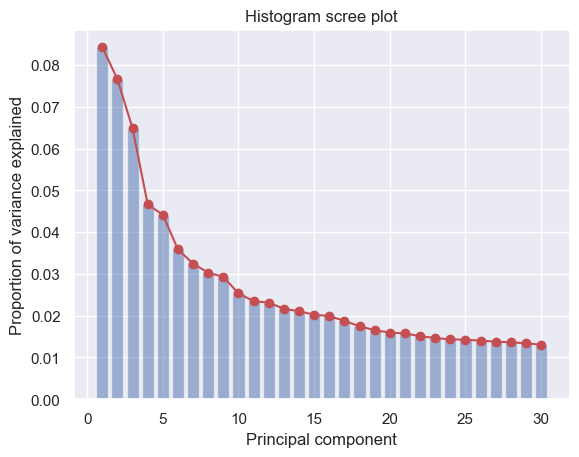

In [30]:
import matplotlib.pyplot as plt
sns.set(style = 'darkgrid')

fig, ax = plt.subplots()
import seaborn as sns
sns.set(style = 'darkgrid')
ax.bar(range(1,31), pca.explained_variance_ratio_, alpha=0.5, align='center')
ax.plot(range(1,31 ), cumulative_variance, 'o-', color='r')

plt.xlabel('Principal component')
plt.ylabel('Proportion of variance explained')
plt.title('Histogram scree plot')

italicized text<h3><b>PCA By Excluding Categoricals<hr>

In [31]:
sel = [i for i in df.columns if i in num.columns]
numericals = df[sel]
numericals

,IsBeta,RtpStateBitfield,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,OsBuild,OsSuite,IsProtected,AutoSampleOptIn,SMode,IeVerIdentifier,Firewall,UacLuaenable,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,Census_ProcessorModelIdentifier,Census_PrimaryDiskTotalCapacity,Census_SystemVolumeTotalCapacity,Census_HasOpticalDiskDrive,Census_TotalPhysicalRAM,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_InternalBatteryNumberOfCharges,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_IsPortableOperatingSystem,Census_IsFlightsDisabled,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,0.0,0.152158,-0.13462,0.399514,-0.612993,-0.117253,0.105946,-1.278033,0.973952,-1.553312,0.692411,0.639543,-1.256613,0.226747,0.0,-0.020004,0.256887,0.152405,0.080257,0.336641,-3.171002,-0.009663,0.363287,-0.039309,-0.096315,-0.236598,-0.277708,-0.450022,0.357459,-0.296658,0.004726,1.688371,0.656342,-0.274700,1.109181,1.290578,-0.033185,0.0,1.041900,0.155991,-0.963853,-0.087511,-0.367699,-0.192689,-0.243791,-0.613565,0.456315,-1.010051
1,0.0,0.152158,-0.13462,0.399514,-0.612993,-0.117253,0.105946,-0.261799,-1.655788,-0.602915,-0.850824,0.639543,-1.256613,0.226747,0.0,-0.020004,0.256887,0.152405,0.080257,0.336641,-2.032443,-0.009663,0.363287,0.036885,-0.096315,-0.850907,-0.277708,-0.450022,-0.482258,-0.496211,-0.612360,-0.592287,0.656342,-0.331385,-0.652061,-0.661613,-0.033185,0.0,1.041900,1.192032,-0.963853,-0.087511,-0.367699,-0.192689,-0.243791,-0.613565,0.015537,-1.010051
2,0.0,0.152158,-0.13462,0.399514,-0.612993,-0.117253,0.105946,-0.372950,1.504750,-1.225199,-1.067166,0.639543,0.795691,0.226747,0.0,-0.020004,0.256887,0.152405,0.080257,2.040959,1.085929,-0.009663,0.363287,-0.478615,-1.131393,-0.814990,-0.277708,-0.450022,0.794112,0.997735,0.846206,1.688371,0.656342,-0.274700,-0.749907,-0.683797,-0.033185,0.0,-1.175902,0.945069,-0.963853,-0.087511,-0.367699,-0.192689,-0.243791,-0.613565,-1.086406,-1.010051
3,0.0,0.152158,-0.13462,0.399514,-0.612993,-0.117253,0.105946,-0.341193,-1.256235,-0.625543,-0.115264,0.639543,-1.256613,0.226747,0.0,-0.020004,0.256887,0.152405,0.080257,-0.594992,0.509131,-0.009663,0.363287,-0.120266,-0.777287,-0.462086,-0.277708,-0.450022,0.290282,-0.496211,-0.612360,1.688371,0.656342,-0.252925,0.228560,0.070459,-0.033185,0.0,-0.203902,-0.611903,-0.963853,-0.087511,-0.367699,-0.192689,-0.243791,-0.613565,-1.086406,0.990050
4,0.0,0.152158,-0.13462,0.399514,-0.612993,-0.117253,0.105946,-1.452698,-0.909920,1.184737,-0.692174,0.639543,0.795691,0.226747,0.0,-0.020004,0.256887,0.152405,0.080257,-0.594992,1.282210,-0.009663,0.363287,0.149985,-0.096315,-0.852419,-0.277708,-0.008814,-0.465464,-0.496211,-0.612360,-0.592287,0.656342,-0.265714,-0.652061,-0.661613,-0.033185,0.0,-0.203902,-0.621731,-0.963853,-0.087511,-0.367699,-0.192689,-0.243791,-0.613565,-1.527184,0.990050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.152158,-0.13462,0.399514,-0.612993,-0.117253,0.105946,-1.055732,1.129322,-1.349655,-1.168125,0.639543,-1.256613,0.226747,0.0,-0.020004,0.256887,0.152405,0.080257,-0.014718,-0.126752,-0.009663,0.363287,-0.091693,-0.777287,-0.743128,-0.277708,0.432393,-0.482258,-0.496211,-0.612360,-0.592287,0.656342,-0.274700,2.185496,2.155754,-0.033185,0.0,0.704210,0.007842,-0.963853,-0.087511,-0.367699,-0.192689,-0.243791,-0.61356

In [36]:
from sklearn.decomposition import PCA # ............................. Import the PCA Algorithm

pca = PCA(n_components = 0.70) # ........................... Instantiate PCA, and amount of
pca.fit(numericals) # .................................................... Fit the PCA Algorithm on the se
numericals_pca = pca.transform(numericals) # ...................................... Transform the df
frame_numericals_pca = pd.DataFrame(numericals_pca)
frame_numericals_pca

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.622637,-0.007722,-1.293777,1.678758,-0.965329,-0.136464,0.509122,1.767316,-2.300146,0.446930,-0.950586,1.107246,0.295621,0.003669,-0.732437,1.536439,-1.056572,-1.624822,-0.312817
1,-0.709046,0.212713,-0.273266,-0.364301,-1.322334,0.921456,-1.340924,1.397158,-0.546255,0.471603,0.114374,1.497455,0.007458,-0.500553,-0.657839,1.353305,0.263045,0.060800,-0.219097
2,1.929735,1.023860,-0.887883,-0.227960,-0.437673,1.413461,0.393873,0.609099,-0.483197,-0.781311,1.474136,0.492967,1.865127,-0.944382,0.619636,-0.792848,-0.151986,-0.912156,-0.197358
3,0.873815,0.756823,-1.824691,0.270864,-1.041892,0.784836,-0.689031,0.488273,-0.378997,-0.032572,0.875066,0.059602,-0.448765,0.408472,-0.428163,-0.057139,0.711293,-0.751119,-0.147866
4,-0.035545,0.355478,-0.275849,-0.668122,-1.178049,0.652481,-1.424862,0.191894,0.231128,0.240925,1.387734,0.378428,-0.313321,-0.001533,-0.053488,-1.096618,0.973287,0.196656,0.139837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.438872,1.028262,-0.926996,2.926091,-0.965170,-0.584173,-0.145179,0.940845,-1.662150,0.318046,0.322610,1.219718,0.500507,-0.485951,0.042899,-0.359733,-0.137268,-0.155766,0.133743
9996,-1.681377,-2.183021,1.349827,-1.901735,1.214236,-0.683668,-0.494574,0.058115,-1.339194,-0.460096,-0.670863,-0.524795,1.969572,0.125168,2.006188,1.073270,-0.029618,0.602602,-0.906249
9997,-0.197231,0.056441,-0.791457,-1.061177,0.629195,-0.037228,-1.868404,-0.810167,0.467970,-1.355506,0.941166,0.153245,-1.472365,0.324970,1.224717,-0.540054,-1.166383,1.808505,-0.414913
9998,2.670256,1.365973,-1.670109,-1.288123,-0.199990,2.098585,-0.091436,1.435616,-1.794089,-1.151678,0.741728,1.278048,-0.552369,1.420408,2.506468,-1.558704,-0.898780,0.100345,-0.298996


In [37]:
new_data = pd.concat([frame_numericals_pca, cat], axis = 1)
new_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,Platform,Processor,OsVer,OsPlatformSubRelease,OsBuildLab,SkuEdition,PuaMode,SmartScreen,Census_MDC2FormFactor,Census_DeviceFamily,Census_ProcessorClass,Census_PrimaryDiskTypeName,Census_ChassisTypeName,Census_PowerPlatformRoleName,Census_InternalBatteryType,Census_OSVersion,Census_OSArchitecture,Census_OSBranch,Census_OSEdition,Census_OSSkuName,Census_OSInstallTypeName,Census_OSWUAutoUpdateOptionsName,Census_GenuineStateName,Census_ActivationChannel,Census_FlightRing
0,0.622637,-0.007722,-1.293777,1.678758,-0.965329,-0.136464,0.509122,1.767316,-2.300146,0.446930,-0.950586,1.107246,0.295621,0.003669,-0.732437,1.536439,-1.056572,-1.624822,-0.312817,0000028988387b115f69f31a3bf04f09,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1735.0,windows10,x64,10.0.0.0,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,NaN,NaN,Desktop,Windows.Desktop,NaN,HDD,Desktop,Desktop,NaN,10.0.17134.165,amd64,rs4_release,Professional,PROFESSIONAL,UUPUpgrade,UNKNOWN,IS_GENUINE,Retail,Retail
1,-0.709046,0.212713,-0.273266,-0.364301,-1.322334,0.921456,-1.340924,1.397158,-0.546255,0.471603,0.114374,1.497455,0.007458,-0.500553,-0.657839,1.353305,0.263045,0.060800,-0.219097,000007535c3f730efa9ea0b7ef1bd645,win8defender,1.1.14600.4,4.13.17134.1,1.263.48.0,windows10,x64,10.0.0.0,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,NaN,NaN,Notebook,Windows.Desktop,NaN,HDD,Notebook,Mobile,NaN,10.0.17134.1,amd64,rs4_release,Professional,PROFESSIONAL,IBSClean,UNKNOWN,OFFLINE,Retail,NOT_SET
2,1.929735,1.023860,-0.887883,-0.227960,-0.437673,1.413461,0.393873,0.609099,-0.483197,-0.781311,1.474136,0.492967,1.865127,-0.944382,0.619636,-0.792848,-0.151986,-0.912156,-0.197358,000007905a28d863f6d0d597892cd692,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1341.0,windows10,x64,10.0.0.0,rs4,17134.1.amd64fre.rs4_release.180410-1804,Home,NaN,RequireAdmin,Desktop,Windows.Desktop,NaN,SSD,Desktop,Desktop,NaN,10.0.17134.165,amd64,rs4_release,Core,CORE,UUPUpgrade,FullAuto,IS_GENUINE,OEM:NONSLP,Retail
3,0.873815,0.756823,-1.824691,0.270864,-1.041892,0.784836,-0.689031,0.488273,-0.378997,-0.032572,0.875066,0.059602,-0.448765,0.408472,-0.428163,-0.057139,0.711293,-0.751119,-0.147866,00000b11598a75ea8ba1beea8459149f,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1527.0,windows10,x64,10.0.0.0,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,NaN,ExistsNotSet,Desktop,Windows.Desktop,NaN,UNKNOWN,MiniTower,Desktop,NaN,10.0.17134.228,amd64,rs4_release,Professional,PROFESSIONAL,UUPUpgrade,FullAuto,IS_GENUINE,OEM:NONSLP,Retail
4,-0.035545,0.355478,-0.275849,-0.668122,-1.178049,0.652481,-1.424862,0.191894,0.231128,0.240925,1.387734,0.378428,-0.313321,-0.001533,-0.053488,-1.096618,0.973287,0.196656,0.139837,000014a5f00daa18e76b81417eeb99fc,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1379.0,windows10,x64,10.0.0.0,rs4,17134.1.amd64fre.rs4_release.180410-1804,Home,NaN,RequireAdmin,Notebook,Windows.Desktop,NaN,HDD,Portable,Mobile,lion,10.0.17134.191,amd64,rs4_release,Core,CORE,Update,FullAuto,IS_GENUINE,Retail,Retail
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.438872,1.028262,-0.926996,2.926091,-0.965170,-0.584173,-0.145179,0.940845,-1.662150,0.318046,0.322610,1.219718,0.500507,-0.485951,0.042899,-0.359733,-0.137268,-0.155766,0.133743,004aad9e0c5fae58a1cd8a077e53af09,win8defender,1.1.15100.1,4.18.1806.18062,1.273.499.0,windows10,x64,10.0.0.0,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,NaN,RequireAdmin,Notebook,Windows.Desktop,NaN,SSD,Notebook,Mobile,NaN,10.0.17134.165,amd64,rs4_release,Professional,PROFESSIONAL,UUPUpgrade,FullAuto,IS_GENUINE,Retail,Retail
9996,-1.681377,-2.183021,1.349827,-1.901735,1.214236,-0.683668,-0.494574,0.058115,-1.339194,-0.460096,-0.670863,-0.524795,1.969572,0.125168,2.006188,1.073270,-0.029618,0.